In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ls '/content/drive/MyDrive/CNN/Datasets/'

test/  train/


In [ ]:
train_path='/content/drive/MyDrive/CNN/Datasets/train'
valid_path='/content/drive/MyDrive/CNN/Datasets/test'

In [ ]:
import pandas as pd
import numpy as np
import os
import PIL
import seaborn as sns
import pickle
from PIL import *
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from IPython.display import display
from tensorflow.python.keras import *
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, optimizers
from tensorflow.keras.layers import *
from tensorflow.keras import backend as K
from keras import optimizers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

In [ ]:
%cd '/content/drive/MyDrive/CNN/Datasets'

/content/drive/.shortcut-targets-by-id/16i3DsmYfkpADi_3joFqjsEGfoPoa_3ol/CNN/Datasets


In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [ ]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/CNN/Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 64,
                                                 class_mode = 'categorical')

# Preprocessing the Test set
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/CNN/Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 64,
                                            class_mode = 'categorical')

Found 5144 images belonging to 3 classes.
Found 1288 images belonging to 3 classes.


In [ ]:
# Part 2 - Building the CNN

# Initialising the CNN
cnn = tf.keras.models.Sequential()

# Step 1 - Convolution
cnn.add(tf.keras.layers.Conv2D(filters=32,padding="same",kernel_size=3, activation='relu', input_shape=[224, 224, 3]))

# Step 2-1 - Pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
# Step 2-2 - conv + Pooling
cnn.add(tf.keras.layers.Conv2D(filters=32,padding="same",kernel_size=3, activation='relu', input_shape=[112, 112, 3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
# Step 2-3 - conv + Pooling
cnn.add(tf.keras.layers.Conv2D(filters=32,padding="same",kernel_size=3, activation='relu', input_shape=[64, 64, 3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Adding a second convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Step 3 - Flattening
cnn.add(tf.keras.layers.Flatten())

# Step 4 - Full Connection
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

# Step 5 - Output Layer
cnn.add(tf.keras.layers.Dense(units=3, activation='softmax'))

In [ ]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 32)        9

In [ ]:
# Part 3 - Training the CNN
# Compiling the CNN

cnn.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics= ["accuracy"])

# Training the CNN on the Training set and evaluating it on the Test set
r = cnn.fit(x = training_set, validation_data = test_set, epochs = 10)

Epoch 1/10
81/81 [==============================] - 2426s 30s/step - loss: 0.5567 - accuracy: 0.7716 - val_loss: 0.2395 - val_accuracy: 0.9107
Epoch 2/10
81/81 [==============================] - 178s 2s/step - loss: 0.3047 - accuracy: 0.8802 - val_loss: 0.2411 - val_accuracy: 0.9107
Epoch 3/10
81/81 [==============================] - 178s 2s/step - loss: 0.2708 - accuracy: 0.8985 - val_loss: 0.1920 - val_accuracy: 0.9348
Epoch 4/10
81/81 [==============================] - 178s 2s/step - loss: 0.2850 - accuracy: 0.8907 - val_loss: 0.2238 - val_accuracy: 0.9270
Epoch 5/10
81/81 [==============================] - 176s 2s/step - loss: 0.2323 - accuracy: 0.9160 - val_loss: 0.2075 - val_accuracy: 0.9239
Epoch 6/10
81/81 [==============================] - 176s 2s/step - loss: 0.2267 - accuracy: 0.9180 - val_loss: 0.1934 - val_accuracy: 0.9247
Epoch 7/10
81/81 [==============================] - 175s 2s/step - loss: 0.2138 - accuracy: 0.9205 - val_loss: 0.1692 - val_accuracy: 0.9379
Epoch 8/10


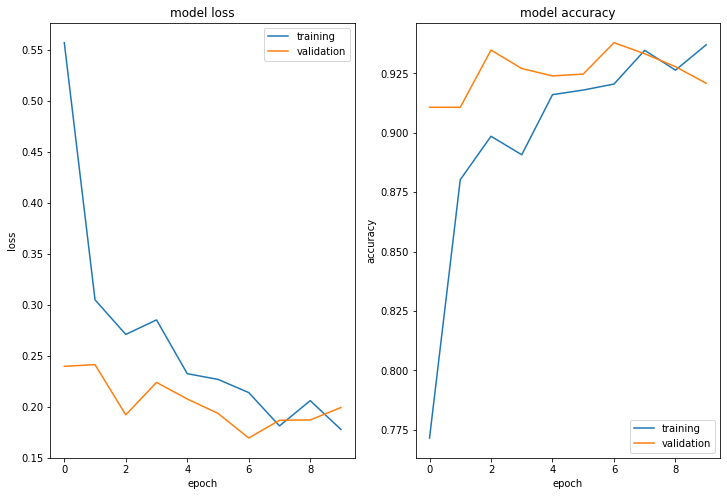

In [ ]:
plt.figure(figsize = (12,8))
plt.subplot(1,2,1)
plt.plot(r.history['loss'])
plt.plot(r.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
  
plt.subplot(1,2,2)
plt.plot(r.history['accuracy'])
plt.plot(r.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')

In [ ]:
model = Sequential()
model.add(Conv2D(32,kernel_size=3,activation='relu',input_shape=(224,224,3)))
model.add(MaxPool2D())
model.add(Dropout(0.5))
model.add(Conv2D(64,kernel_size=3,activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(0.5))
model.add(Conv2D(64,kernel_size=3,activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 52, 52, 64)       

In [ ]:
m = model.fit(x = training_set, validation_data = test_set, epochs = 10)

Epoch 1/10
81/81 [==============================] - 182s 2s/step - loss: 0.9296 - accuracy: 0.6711 - val_loss: 0.6691 - val_accuracy: 0.8152
Epoch 2/10
81/81 [==============================] - 179s 2s/step - loss: 0.5240 - accuracy: 0.7677 - val_loss: 0.4389 - val_accuracy: 0.8797
Epoch 3/10
81/81 [==============================] - 179s 2s/step - loss: 0.4121 - accuracy: 0.8293 - val_loss: 0.4052 - val_accuracy: 0.8967
Epoch 4/10
81/81 [==============================] - 178s 2s/step - loss: 0.4163 - accuracy: 0.8299 - val_loss: 0.5031 - val_accuracy: 0.9146
Epoch 5/10
81/81 [==============================] - 178s 2s/step - loss: 0.3465 - accuracy: 0.8635 - val_loss: 0.3101 - val_accuracy: 0.9146
Epoch 6/10
81/81 [==============================] - 178s 2s/step - loss: 0.3292 - accuracy: 0.8699 - val_loss: 0.3506 - val_accuracy: 0.9161
Epoch 7/10
81/81 [==============================] - 178s 2s/step - loss: 0.3100 - accuracy: 0.8797 - val_loss: 0.3112 - val_accuracy: 0.9068
Epoch 8/10
81

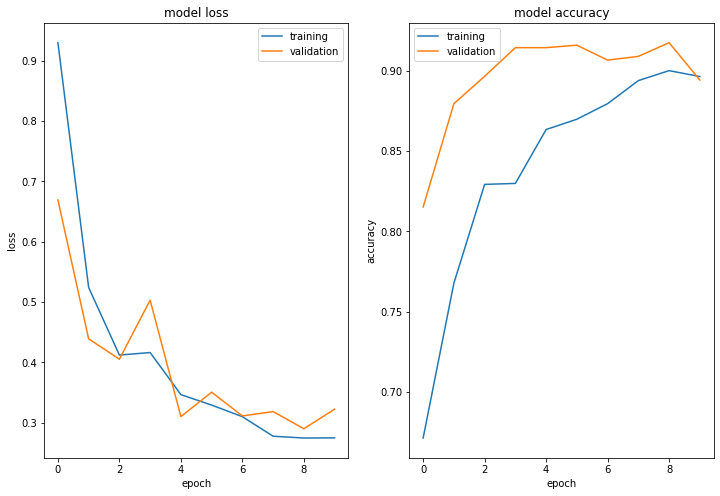

In [ ]:
plt.figure(figsize = (12,8))
plt.subplot(1,2,1)
plt.plot(m.history['loss'])
plt.plot(m.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
  
plt.subplot(1,2,2)
plt.plot(m.history['accuracy'])
plt.plot(m.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')

In [ ]:
model = Sequential()
model.add(Conv2D(32,kernel_size=3,activation='relu',input_shape=(224,224,3)))
model.add(MaxPool2D())
model.add(Conv2D(64,kernel_size=3,activation='relu'))
model.add(MaxPool2D())
model.add(Conv2D(64,kernel_size=3,activation='relu'))
model.add(MaxPool2D())
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 52, 52, 64)        36928     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 26, 26, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 43264)            

In [ ]:
m = model.fit(x = training_set, validation_data = test_set, epochs = 10)

Epoch 1/10
81/81 [==============================] - 181s 2s/step - loss: 0.5495 - accuracy: 0.7795 - val_loss: 0.2727 - val_accuracy: 0.8944
Epoch 2/10
81/81 [==============================] - 180s 2s/step - loss: 0.3115 - accuracy: 0.8804 - val_loss: 0.2442 - val_accuracy: 0.9138
Epoch 3/10
81/81 [==============================] - 180s 2s/step - loss: 0.2524 - accuracy: 0.9026 - val_loss: 0.2015 - val_accuracy: 0.9340
Epoch 4/10
81/81 [==============================] - 181s 2s/step - loss: 0.2674 - accuracy: 0.8999 - val_loss: 0.1966 - val_accuracy: 0.9262
Epoch 5/10
81/81 [==============================] - 181s 2s/step - loss: 0.2273 - accuracy: 0.9143 - val_loss: 0.1835 - val_accuracy: 0.9286
Epoch 6/10
81/81 [==============================] - 181s 2s/step - loss: 0.2299 - accuracy: 0.9170 - val_loss: 0.2101 - val_accuracy: 0.9200
Epoch 7/10
81/81 [==============================] - 180s 2s/step - loss: 0.1947 - accuracy: 0.9267 - val_loss: 0.1952 - val_accuracy: 0.9216
Epoch 8/10
81

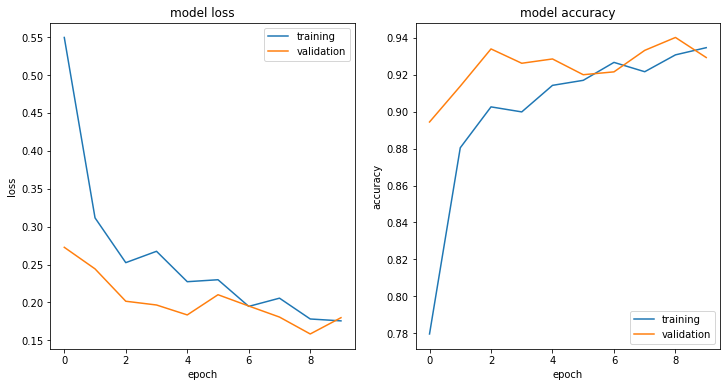

In [ ]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.plot(m.history['loss'])
plt.plot(m.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
  
plt.subplot(1,2,2)
plt.plot(m.history['accuracy'])
plt.plot(m.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')

In [ ]:
model = Sequential()
model.add(Conv2D(32,kernel_size=3,activation='relu',input_shape=(224,224,3)))
model.add(MaxPool2D())
model.add(Conv2D(64,kernel_size=3,activation='relu'))
model.add(MaxPool2D())
model.add(Conv2D(128,kernel_size=3,activation='relu'))
model.add(MaxPool2D())
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer=Adam(0.0001), loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 26, 26, 128)       0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 86528)            

In [ ]:
m = model.fit(x = training_set, validation_data = test_set, epochs = 10)

Epoch 1/10
81/81 [==============================] - 175s 2s/step - loss: 0.5756 - accuracy: 0.7615 - val_loss: 0.2843 - val_accuracy: 0.8890
Epoch 2/10
81/81 [==============================] - 173s 2s/step - loss: 0.3239 - accuracy: 0.8750 - val_loss: 0.2260 - val_accuracy: 0.9216
Epoch 3/10
81/81 [==============================] - 175s 2s/step - loss: 0.2788 - accuracy: 0.8956 - val_loss: 0.1966 - val_accuracy: 0.9363
Epoch 4/10
81/81 [==============================] - 173s 2s/step - loss: 0.2488 - accuracy: 0.9110 - val_loss: 0.2248 - val_accuracy: 0.9115
Epoch 5/10
81/81 [==============================] - 173s 2s/step - loss: 0.2382 - accuracy: 0.9117 - val_loss: 0.2382 - val_accuracy: 0.8998
Epoch 6/10
81/81 [==============================] - 174s 2s/step - loss: 0.2334 - accuracy: 0.9150 - val_loss: 0.2428 - val_accuracy: 0.9022
Epoch 7/10
81/81 [==============================] - 173s 2s/step - loss: 0.2268 - accuracy: 0.9180 - val_loss: 0.1812 - val_accuracy: 0.9301
Epoch 8/10
81

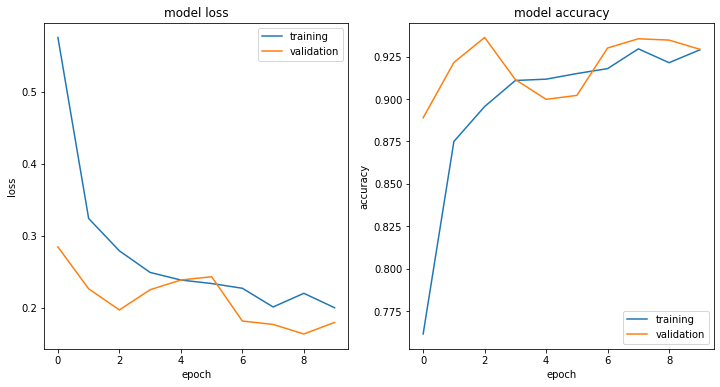

In [ ]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.plot(m.history['loss'])
plt.plot(m.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
  
plt.subplot(1,2,2)
plt.plot(m.history['accuracy'])
plt.plot(m.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')

In [ ]:
model = Sequential()
model.add(Conv2D(32,kernel_size=3,activation='relu',input_shape=(224,224,3)))
model.add(MaxPool2D())
model.add(Conv2D(64,kernel_size=3,activation='relu'))
model.add(MaxPool2D())
model.add(Conv2D(128,kernel_size=3,activation='relu'))
model.add(MaxPool2D())
model.add(Conv2D(128,kernel_size=3,activation='relu'))
model.add(MaxPool2D())
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer=Adam(0.0001), loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 26, 26, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 24, 24, 128)      

In [ ]:
m = model.fit(x = training_set, validation_data = test_set, epochs = 10)

Epoch 1/10
81/81 [==============================] - 182s 2s/step - loss: 0.7551 - accuracy: 0.6839 - val_loss: 0.4210 - val_accuracy: 0.8339
Epoch 2/10
81/81 [==============================] - 172s 2s/step - loss: 0.3544 - accuracy: 0.8591 - val_loss: 0.2764 - val_accuracy: 0.8820
Epoch 3/10
81/81 [==============================] - 172s 2s/step - loss: 0.3063 - accuracy: 0.8826 - val_loss: 0.2427 - val_accuracy: 0.9161
Epoch 4/10
81/81 [==============================] - 173s 2s/step - loss: 0.2892 - accuracy: 0.8865 - val_loss: 0.2287 - val_accuracy: 0.9169
Epoch 5/10
81/81 [==============================] - 173s 2s/step - loss: 0.2708 - accuracy: 0.8989 - val_loss: 0.2252 - val_accuracy: 0.9177
Epoch 6/10
81/81 [==============================] - 173s 2s/step - loss: 0.2502 - accuracy: 0.9038 - val_loss: 0.2344 - val_accuracy: 0.9061
Epoch 7/10
81/81 [==============================] - 174s 2s/step - loss: 0.2421 - accuracy: 0.9123 - val_loss: 0.2067 - val_accuracy: 0.9239
Epoch 8/10
81

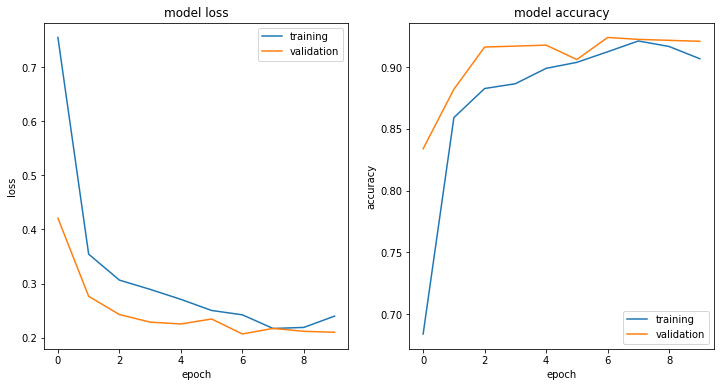

In [ ]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.plot(m.history['loss'])
plt.plot(m.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
  
plt.subplot(1,2,2)
plt.plot(m.history['accuracy'])
plt.plot(m.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')

In [ ]:
model = Sequential()
model.add(Conv2D(32,kernel_size=3,activation='relu',input_shape=(224,224,3)))
model.add(MaxPool2D())
model.add(Conv2D(64,kernel_size=3,activation='relu'))
model.add(MaxPool2D())
model.add(Conv2D(128,kernel_size=3,activation='relu'))
model.add(MaxPool2D())
model.add(Conv2D(128,kernel_size=3,activation='relu'))
model.add(MaxPool2D())
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer=Adam(0.0005), loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 26, 26, 128)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 24, 24, 128)      

In [ ]:
m = model.fit(x = training_set, validation_data = test_set, epochs = 10)

Epoch 1/10
81/81 [==============================] - 175s 2s/step - loss: 0.5480 - accuracy: 0.7759 - val_loss: 0.2280 - val_accuracy: 0.9185
Epoch 2/10
81/81 [==============================] - 173s 2s/step - loss: 0.3185 - accuracy: 0.8791 - val_loss: 0.2368 - val_accuracy: 0.9154
Epoch 3/10
81/81 [==============================] - 173s 2s/step - loss: 0.2876 - accuracy: 0.8890 - val_loss: 0.2407 - val_accuracy: 0.9037
Epoch 4/10
81/81 [==============================] - 174s 2s/step - loss: 0.2544 - accuracy: 0.9067 - val_loss: 0.2438 - val_accuracy: 0.9123
Epoch 5/10
81/81 [==============================] - 173s 2s/step - loss: 0.2181 - accuracy: 0.9230 - val_loss: 0.2018 - val_accuracy: 0.9301
Epoch 6/10
81/81 [==============================] - 174s 2s/step - loss: 0.2060 - accuracy: 0.9238 - val_loss: 0.1986 - val_accuracy: 0.9317
Epoch 7/10
81/81 [==============================] - 174s 2s/step - loss: 0.1953 - accuracy: 0.9306 - val_loss: 0.2208 - val_accuracy: 0.9216
Epoch 8/10
81

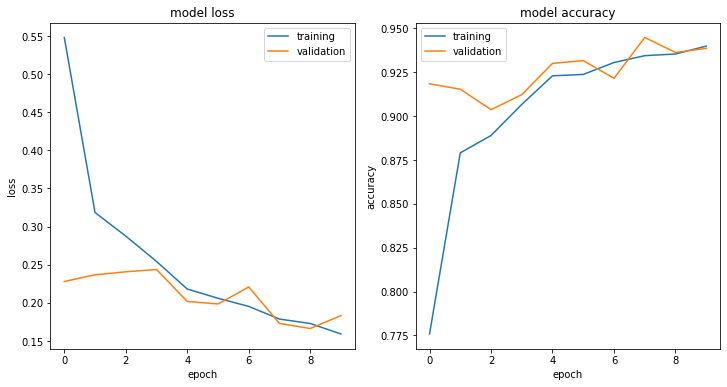

In [ ]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.plot(m.history['loss'])
plt.plot(m.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
  
plt.subplot(1,2,2)
plt.plot(m.history['accuracy'])
plt.plot(m.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')

In [ ]:
model = Sequential()
model.add(Conv2D(32,kernel_size=3,activation='relu',input_shape=(224,224,3)))
model.add(MaxPool2D())
model.add(Conv2D(64,kernel_size=3,activation='relu'))
model.add(MaxPool2D())
model.add(Conv2D(256,kernel_size=3,activation='relu'))
model.add(MaxPool2D())
model.add(Conv2D(128,kernel_size=3,activation='relu'))
model.add(MaxPool2D())
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer=Adam(0.0005), loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 52, 52, 256)       147712    
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 26, 26, 256)       0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 24, 24, 128)      

In [ ]:
m = model.fit(x = training_set, validation_data = test_set, epochs = 10)

Epoch 1/10
81/81 [==============================] - 177s 2s/step - loss: 0.5976 - accuracy: 0.7558 - val_loss: 0.2746 - val_accuracy: 0.8944
Epoch 2/10
81/81 [==============================] - 173s 2s/step - loss: 0.3489 - accuracy: 0.8629 - val_loss: 0.2536 - val_accuracy: 0.9076
Epoch 3/10
81/81 [==============================] - 175s 2s/step - loss: 0.2712 - accuracy: 0.8944 - val_loss: 0.2170 - val_accuracy: 0.9286
Epoch 4/10
81/81 [==============================] - 177s 2s/step - loss: 0.2397 - accuracy: 0.9119 - val_loss: 0.2019 - val_accuracy: 0.9286
Epoch 5/10
81/81 [==============================] - 175s 2s/step - loss: 0.2181 - accuracy: 0.9203 - val_loss: 0.1734 - val_accuracy: 0.9379
Epoch 6/10
81/81 [==============================] - 174s 2s/step - loss: 0.2135 - accuracy: 0.9219 - val_loss: 0.1741 - val_accuracy: 0.9332
Epoch 7/10
81/81 [==============================] - 174s 2s/step - loss: 0.1901 - accuracy: 0.9323 - val_loss: 0.2215 - val_accuracy: 0.9255
Epoch 8/10
81

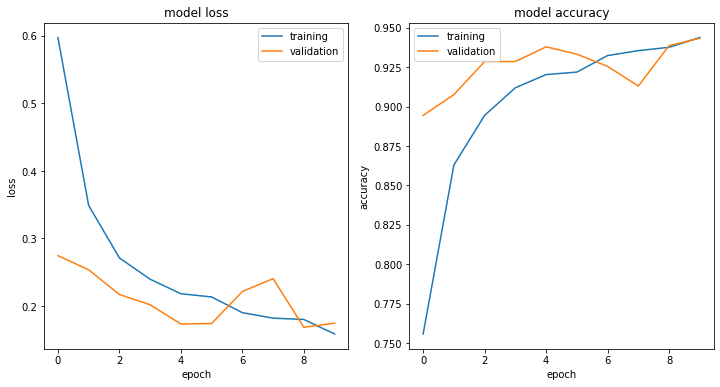

In [ ]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.plot(m.history['loss'])
plt.plot(m.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
  
plt.subplot(1,2,2)
plt.plot(m.history['accuracy'])
plt.plot(m.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')

In [ ]:
model = Sequential()
model.add(Conv2D(32,kernel_size=3,activation='relu',input_shape=(224,224,3)))
model.add(MaxPool2D())
model.add(Conv2D(64,kernel_size=3,activation='relu'))
model.add(MaxPool2D())
model.add(Conv2D(128,kernel_size=3,activation='relu'))
model.add(MaxPool2D())
model.add(Conv2D(128,kernel_size=3,activation='relu'))
model.add(MaxPool2D())
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer=Adam(0.0005), loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 128)       1

In [ ]:
m = model.fit(x = training_set, validation_data = test_set, epochs = 20)

Epoch 1/20
81/81 [==============================] - ETA: 0s - loss: 0.5716 - accuracy: 0.7648 

UnknownError: ignored

In [ ]:
m = model.fit(x = training_set, validation_data = test_set, epochs = 20)

Epoch 1/20
81/81 [==============================] - ETA: 0s - loss: 0.3389 - accuracy: 0.8664

UnidentifiedImageError: ignored